In [165]:
# imports 

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.linear_model import LinearRegression, LogisticRegression 
from sklearn.model_selection import train_test_split, KFold, LeaveOneOut, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

import statsmodels.api as sm

In [166]:
pwd

'/Users/emilynaftalin/Data_Science/General Assembly/dsi/projects/project-2'

In [170]:
cd project-2

/Users/emilynaftalin/Data_Science/General Assembly/dsi/projects/project-2


In [171]:
# loading in datasets 

train = pd.read_csv('./datasets/train.csv')
test = pd.read_csv('./datasets/test.csv')

In [264]:
len(train)

2049

In [263]:
len(test)

878

**Data Dictionary:** 
https://www.kaggle.com/c/dsir-1116-ames-regression-challenge/data

### Basic EDA

In [172]:
# checking out data

train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [173]:
len(train)

2051

In [174]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

In [175]:
# finding the nulls
train.isnull().sum()

Id                0
PID               0
MS SubClass       0
MS Zoning         0
Lot Frontage    330
               ... 
Misc Val          0
Mo Sold           0
Yr Sold           0
Sale Type         0
SalePrice         0
Length: 81, dtype: int64

In [176]:
#putting nulls into DF 
nulls = pd.DataFrame(train.isnull().sum())
nulls

,0
Id,0
PID,0
MS SubClass,0
MS Zoning,0
Lot Frontage,330
...,...
Misc Val,0
Mo Sold,0
Yr Sold,0
Sale Type,0


In [177]:
#count of null values for each feature with null values 
nulls[nulls[0]!=0]

,0
Lot Frontage,330
Alley,1911
Mas Vnr Type,22
Mas Vnr Area,22
Bsmt Qual,55
Bsmt Cond,55
Bsmt Exposure,58
BsmtFin Type 1,55
BsmtFin SF 1,1
BsmtFin Type 2,56


In [178]:
# checking out the columns (now rows) with null values 
train.loc[:, train.isna().any()].T

,0,1,2,3,4,5,6,7,8,9,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
Lot Frontage,NaN,43,68,73,82,137,35,NaN,NaN,70,...,110,45,50,65,96,79,NaN,57,80,60
Alley,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Grvl,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mas Vnr Type,BrkFace,BrkFace,None,None,None,None,BrkFace,BrkFace,None,BrkFace,...,BrkFace,None,None,BrkFace,Stone,None,None,None,None,None
Mas Vnr Area,289,132,0,0,0,0,82,180,0,192,...,664,0,0,38,426,0,0,0,0,0
Bsmt Qual,TA,Gd,TA,Gd,Fa,TA,Gd,TA,TA,Gd,...,Ex,TA,TA,Gd,Ex,Gd,TA,TA,TA,TA
Bsmt Cond,TA,TA,TA,TA,Gd,TA,TA,TA,TA,TA,...,TA,TA,TA,TA,TA,TA,TA,TA,TA,TA
Bsmt Exposure,No,No,No,No,No,No,Gd,No,No,Av,...,Av,No,Mn,No,Av,Av,No,No,No,No
BsmtFin Type 1,GLQ,GLQ,GLQ,Unf,Unf,ALQ,GLQ,Rec,Rec,Rec,...,GLQ,Unf,Rec,GLQ,GLQ,GLQ,BLQ,Unf,Rec,Unf
BsmtFin SF 1,533,637,731,0,0,247,547,1000,292,650,...,1016,0,276,362,1336,1011,262,0,155,0
BsmtFin Type 2,Unf,Unf,Unf,Unf,Unf,Rec,Unf,Unf,Unf,Unf,...,Unf,Unf,Unf,Unf,Unf,Unf,Unf,Unf,LwQ,Unf


In [179]:
# How about I try to print the training dataframe in ten-column increments to see what I can see 
train.iloc[:,0:11]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub
...,...,...,...,...,...,...,...,...,...,...,...
2046,1587,921126030,20,RL,79.0,11449,Pave,NaN,IR1,HLS,AllPub
2047,785,905377130,30,RL,NaN,12342,Pave,NaN,IR1,Lvl,AllPub
2048,916,909253010,50,RL,57.0,7558,Pave,NaN,Reg,Bnk,AllPub
2049,639,535179160,20,RL,80.0,10400,Pave,NaN,Reg,Lvl,AllPub


In [133]:
train.iloc[:,11:21]

,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built
0,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976
1,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996
2,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953
3,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006
4,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900
...,...,...,...,...,...,...,...,...,...,...
2046,Inside,Gtl,Timber,Norm,Norm,1Fam,1Story,8,5,2007
2047,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,4,5,1940
2048,Inside,Gtl,Crawfor,Norm,Norm,1Fam,1.5Fin,6,6,1928
2049,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,4,5,1956


In [134]:
train.iloc[:,21:31]

,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation
0,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock
1,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc
2,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock
3,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc
4,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc
...,...,...,...,...,...,...,...,...,...,...
2046,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc
2047,1950,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock
2048,1950,Gable,CompShg,BrkFace,Stone,None,0.0,TA,TA,BrkTil
2049,1956,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock


In [135]:
train.iloc[:,31:41]

,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating
0,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA
1,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA
2,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA
3,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA
4,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA
...,...,...,...,...,...,...,...,...,...,...
2046,Gd,TA,Av,GLQ,1011.0,Unf,0.0,873.0,1884.0,GasA
2047,TA,TA,No,BLQ,262.0,Unf,0.0,599.0,861.0,GasA
2048,TA,TA,No,Unf,0.0,Unf,0.0,896.0,896.0,GasA
2049,TA,TA,No,Rec,155.0,LwQ,750.0,295.0,1200.0,GasA


In [136]:
train.iloc[:, 41:51]

,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath
0,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2
1,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2
2,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1
3,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2
4,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...
2046,Ex,Y,SBrkr,1728,0,0,1728,1.0,0.0,2
2047,Ex,Y,SBrkr,861,0,0,861,0.0,0.0,1
2048,Gd,Y,SBrkr,1172,741,0,1913,0.0,0.0,1
2049,TA,Y,SBrkr,1200,0,0,1200,1.0,0.0,1


In [137]:
train.iloc[:,51:61]

,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt
0,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0
1,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0
2,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0
3,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0
4,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0
...,...,...,...,...,...,...,...,...,...,...
2046,0,3,1,Gd,7,Typ,1,Gd,Attchd,2007.0
2047,0,1,1,TA,4,Typ,0,NaN,Detchd,1961.0
2048,1,3,1,TA,9,Typ,1,TA,Detchd,1929.0
2049,0,3,1,TA,6,Typ,2,Gd,Attchd,1956.0


In [138]:
train.iloc[:,61:71]

,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch
0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0
1,RFn,2.0,559.0,TA,TA,Y,0,74,0,0
2,Unf,1.0,246.0,TA,TA,Y,0,52,0,0
3,Fin,2.0,400.0,TA,TA,Y,100,0,0,0
4,Unf,2.0,484.0,TA,TA,N,0,59,0,0
...,...,...,...,...,...,...,...,...,...,...
2046,Fin,2.0,520.0,TA,TA,Y,0,276,0,0
2047,Unf,2.0,539.0,TA,TA,Y,158,0,0,0
2048,Unf,2.0,342.0,Fa,Fa,Y,0,0,0,0
2049,Unf,1.0,294.0,TA,TA,Y,0,189,140,0


In [139]:
train.iloc[:,71:82]

,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,0,0,NaN,NaN,NaN,0,3,2010,WD,138500
...,...,...,...,...,...,...,...,...,...,...
2046,0,0,NaN,NaN,NaN,0,1,2008,WD,298751
2047,0,0,NaN,NaN,NaN,0,3,2009,WD,82500
2048,0,0,NaN,NaN,NaN,0,3,2009,WD,177000
2049,0,0,NaN,NaN,NaN,0,11,2009,WD,144000


In [180]:
# correlation matrix 
train.corr()

## Looks like I will have to do this by in chunks so I can see the middle columns 

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
Id,1.000000,0.175793,0.026543,-0.024967,0.032872,-0.061483,-0.026096,-0.064444,-0.090040,-0.035493,...,-0.009045,0.001382,0.033747,-0.022791,0.009758,0.055696,-0.012683,0.127723,-0.975747,-0.051398
PID,0.175793,1.000000,-0.003632,-0.091291,0.024135,-0.265863,0.106861,-0.347039,-0.176666,-0.247959,...,-0.041221,-0.081129,0.150179,-0.024679,-0.042030,0.005825,0.004223,-0.032735,0.008476,-0.255052
MS SubClass,0.026543,-0.003632,1.000000,-0.389790,-0.245484,0.035763,-0.070141,0.035983,0.044836,-0.004047,...,0.001622,-0.020289,-0.039842,-0.030088,-0.038819,-0.004585,-0.027485,0.013027,-0.032870,-0.087335
Lot Frontage,-0.024967,-0.091291,-0.389790,1.000000,0.574024,0.194808,-0.054455,0.109504,0.085052,0.218218,...,0.115180,0.184958,-0.003302,0.031855,0.074819,0.156575,0.051676,-0.017389,0.009112,0.341842
Lot Area,0.032872,0.024135,-0.245484,0.574024,1.000000,0.105824,-0.019185,0.036002,0.050771,0.169379,...,0.155623,0.140864,0.014139,0.019553,0.067714,0.115102,0.093922,0.003197,-0.029454,0.296566
Overall Qual,-0.061483,-0.265863,0.035763,0.194808,0.105824,1.000000,-0.082770,0.602964,0.584654,0.438685,...,0.257081,0.308855,-0.154554,0.031938,0.048752,0.006558,0.022099,0.019242,-0.011578,0.800207
Overall Cond,-0.026096,0.106861,-0.070141,-0.054455,-0.019185,-0.082770,1.000000,-0.370988,0.042614,-0.135878,...,0.011034,-0.052266,0.108320,0.026907,0.047359,-0.005806,0.014269,-0.003144,0.047664,-0.097019
Year Built,-0.064444,-0.347039,0.035983,0.109504,0.036002,0.602964,-0.370988,1.000000,0.629116,0.329741,...,0.216339,0.207798,-0.380082,0.016104,-0.037866,0.003728,0.000626,-0.007083,-0.003559,0.571849
Year Remod/Add,-0.090040,-0.176666,0.044836,0.085052,0.050771,0.584654,0.042614,0.629116,1.000000,0.211443,...,0.216271,0.264476,-0.237523,0.040416,-0.041211,-0.022382,-0.001704,0.011568,0.042744,0.550370
Mas Vnr Area,-0.035493,-0.247959,-0.004047,0.218218,0.169379,0.438685,-0.135878,0.329741,0.211443,1.000000,...,0.163584,0.163489,-0.107104,0.011161,0.086631,0.012422,0.079219,-0.001472,-0.018719,0.512230


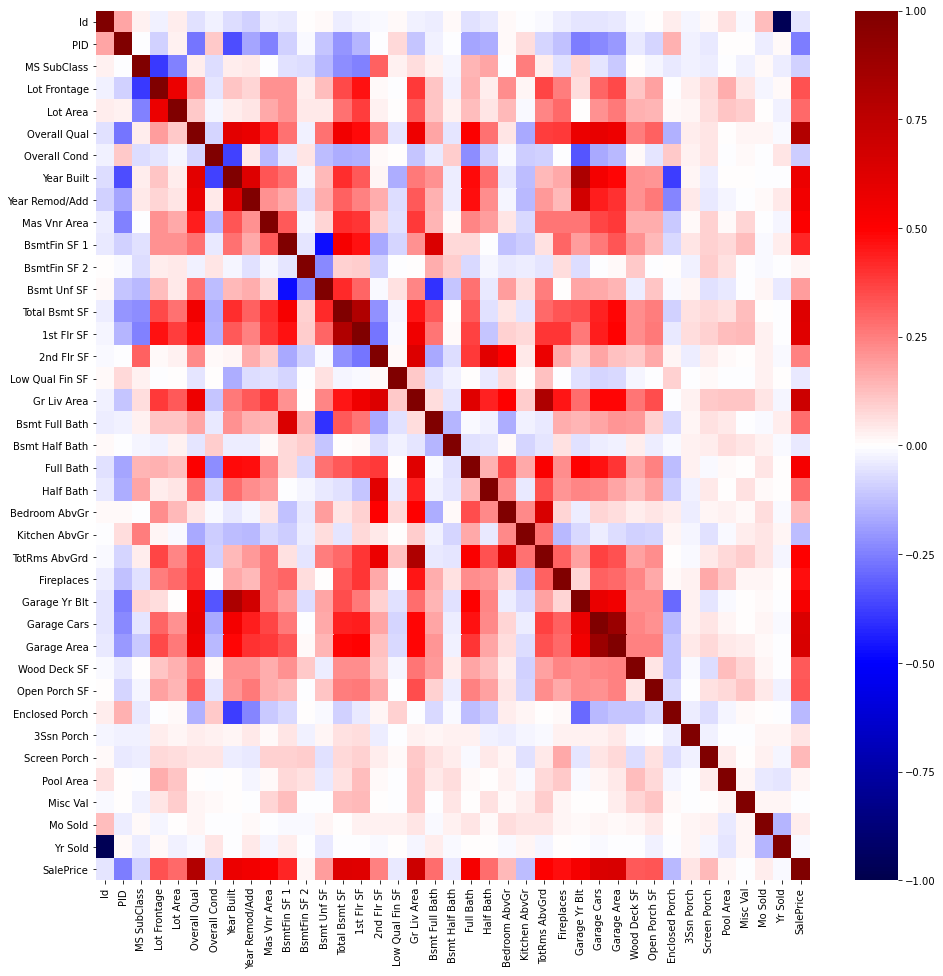

In [182]:
# starter heatmap to start seeing correlations 

plt.figure(figsize=(16,16))
sns.heatmap(train.corr(), vmin=-1, vmax=1, cmap='seismic');

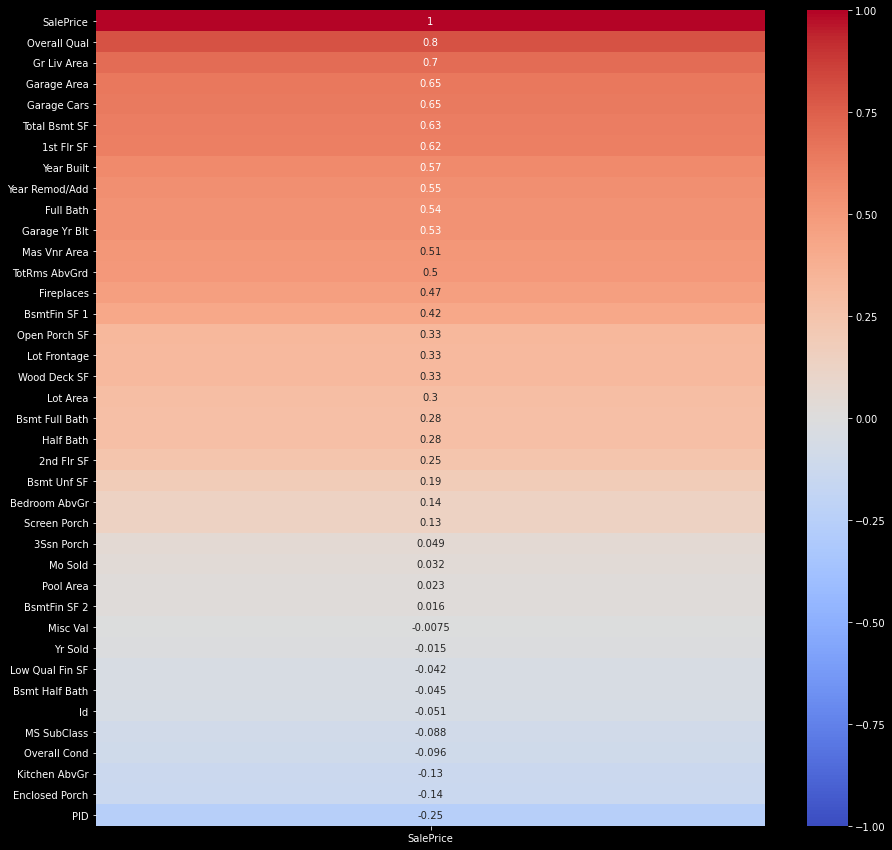

In [412]:
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(15, 15))
plt.fontsize = 27
sns.heatmap(train.corr()[['SalePrice']].sort_values('SalePrice', ascending = False),
            annot = True, cmap = 'coolwarm', vmin = -1, vmax = 1);

In [183]:
train.describe()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2051.000000,2.051000e+03,2051.000000,1721.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2029.000000,...,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,1474.033642,7.135900e+08,57.008776,69.055200,10065.208191,6.112140,5.562165,1971.708922,1984.190151,99.695909,...,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855,51.574354,6.219893,2007.775719,181469.701609
std,843.980841,1.886918e+08,42.824223,23.260653,6742.488909,1.426271,1.104497,30.177889,21.036250,174.963129,...,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570,573.393985,2.744736,1.312014,79258.659352
min,1.000000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,753.500000,5.284581e+08,20.000000,58.000000,7500.000000,5.000000,5.000000,1953.500000,1964.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129825.000000
50%,1486.000000,5.354532e+08,50.000000,68.000000,9430.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,2198.000000,9.071801e+08,70.000000,80.000000,11513.500000,7.000000,6.000000,2001.000000,2004.000000,161.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2930.000000,9.241520e+08,190.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000


In [184]:
# these columns are numeric columns 

train.describe().columns

Index(['Id', 'PID', 'MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area',
       'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area',
       'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath',
       'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces',
       'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'Wood Deck SF',
       'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch',
       'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold', 'SalePrice'],
      dtype='object')

In [185]:
train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [186]:
# building pairplot using numeric columns from above 

xvars = ['Lot Frontage', 'Lot Area', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area',
       'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       '1st Flr SF', '2nd Flr SF', 'Gr Liv Area','SalePrice']

yvars = ['Garage Yr Blt', 'Garage Area', 'Wood Deck SF',
       'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch',
       'Pool Area', 'Misc Val', 'SalePrice']

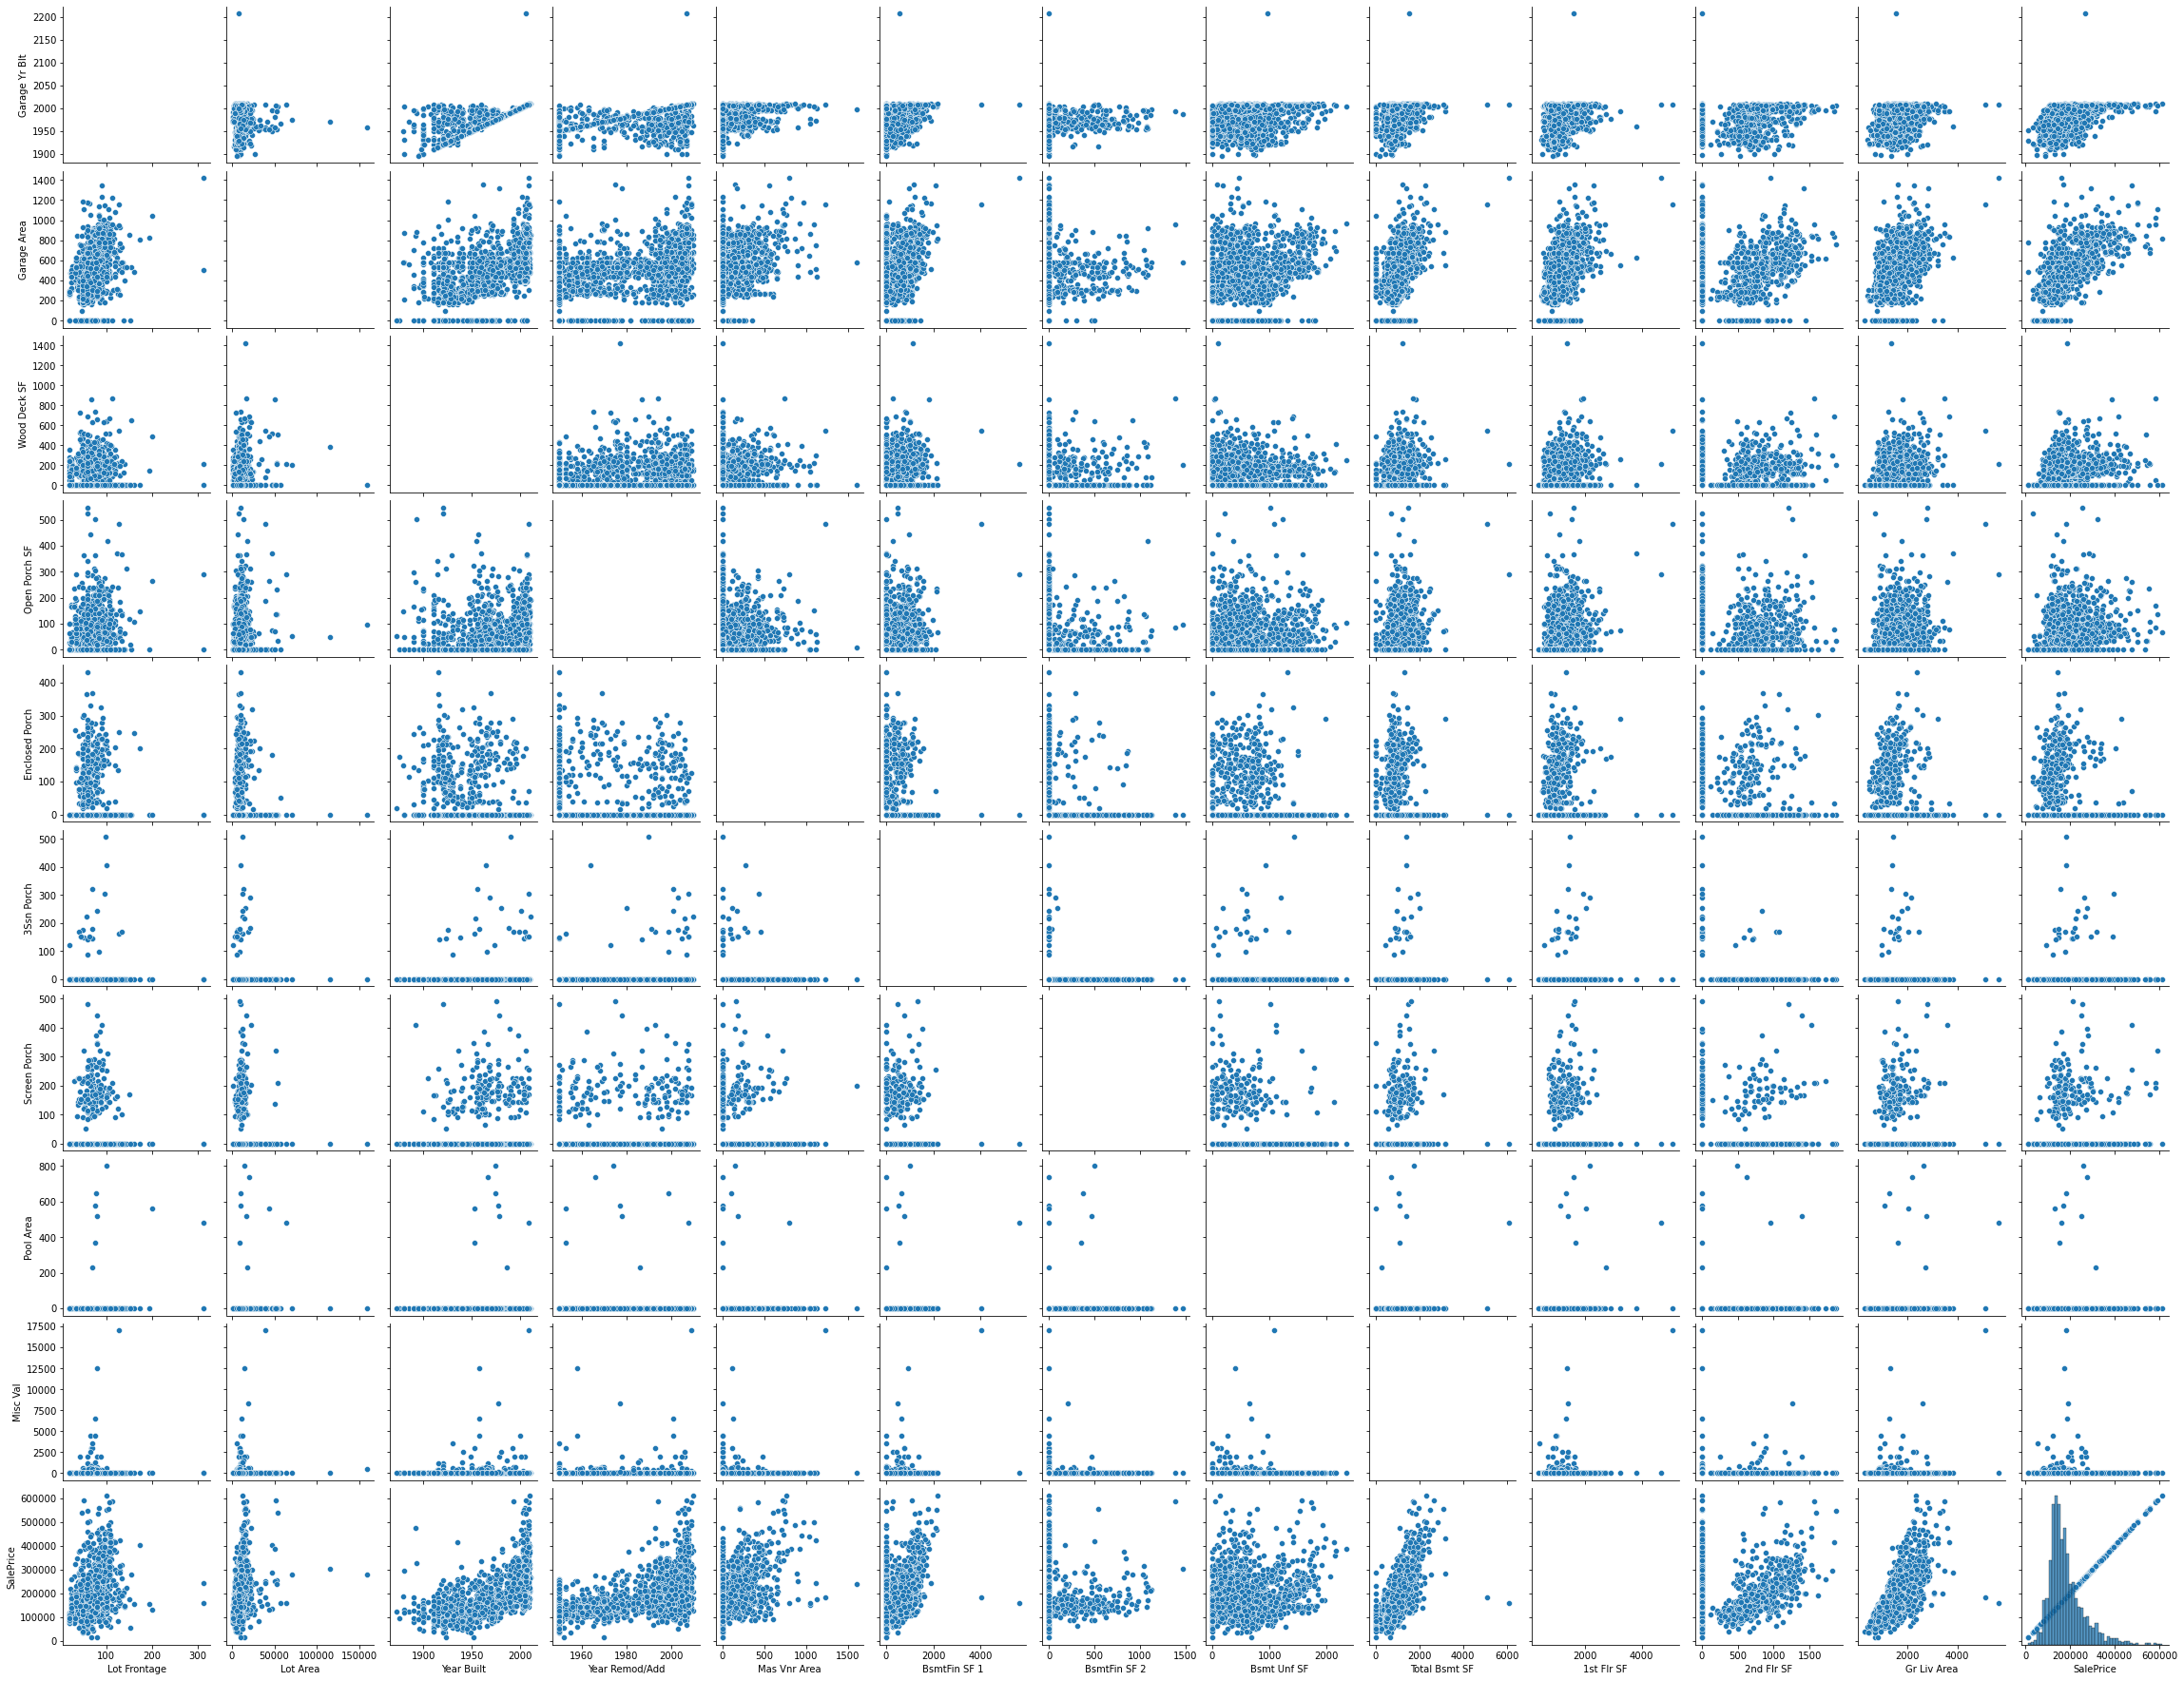

In [187]:
sns.pairplot(data=train, x_vars=xvars, y_vars=yvars);

In [188]:
# finding numeric columns that are discrete 
# therefore they might need to be dummified 

In [189]:
num_cols = train.describe().columns

In [190]:
num_cols

Index(['Id', 'PID', 'MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area',
       'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area',
       'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath',
       'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces',
       'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'Wood Deck SF',
       'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch',
       'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold', 'SalePrice'],
      dtype='object')

In [191]:
# these columns are included in the xvars/yvars above

continuous_cols = ['Lot Area', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area',
       'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       '1st Flr SF', '2nd Flr SF', 'Gr Liv Area','Garage Yr Blt', 'Garage Area', 'Wood Deck SF',
       'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch',
       'Pool Area', 'Misc Val', 'SalePrice']

In [192]:
# These are discrete variables 

discrete_cols = [x for x in num_cols if x not in continuous_cols]
discrete_cols

['Id',
 'PID',
 'MS SubClass',
 'Lot Frontage',
 'Overall Qual',
 'Overall Cond',
 'Low Qual Fin SF',
 'Bsmt Full Bath',
 'Bsmt Half Bath',
 'Full Bath',
 'Half Bath',
 'Bedroom AbvGr',
 'Kitchen AbvGr',
 'TotRms AbvGrd',
 'Fireplaces',
 'Garage Cars',
 'Mo Sold',
 'Yr Sold']

### Dealing with null values 

In [215]:
train.isnull().sum()

Id              0
PID             0
MS SubClass     0
MS Zoning       0
Lot Frontage    0
               ..
Misc Val        0
Mo Sold         0
Yr Sold         0
Sale Type       0
SalePrice       0
Length: 81, dtype: int64

In [216]:
# as above, trying see all the null values
nulls = pd.DataFrame(train.isnull().sum())
nulls

,0
Id,0
PID,0
MS SubClass,0
MS Zoning,0
Lot Frontage,0
...,...
Misc Val,0
Mo Sold,0
Yr Sold,0
Sale Type,0


In [217]:
#count of null values for each feature with null values 
nulls_df = nulls[nulls[0]!=0]
nulls_df

## for categorical variables, the null values will be ignored i.e. turned to zero in the newly created columns. 
## Citation: https://stackoverflow.com/questions/51147326/python-nulls-are-getting-dropped-by-pd-get-dummies
## So pay close attention to this! 

,0
Alley,1909
Mas Vnr Type,22
Bsmt Qual,54
Bsmt Cond,54
Bsmt Exposure,57
BsmtFin Type 1,54
BsmtFin Type 2,55
Bsmt Full Bath,1
Bsmt Half Bath,1
Fireplace Qu,998


In [218]:
train[train['BsmtFin SF 1'].isnull()]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice


In [194]:
# only row with null value so dropping 
train = train[train['BsmtFin SF 1'].notna()]
train = train[train['Garage Area'].notna()]

In [222]:
# taking care below of three numeric columns with nulls: 'Mas Vnr Area', 'Garage Yr Blt', 'Lot Frontage'

In [196]:
train['Lot Frontage'].mean()

69.04886561954625

In [197]:
#replacing null values in Lot Frontage with mean of column 
train['Lot Frontage'].fillna(train['Lot Frontage'].mean(), inplace=True)

In [220]:
#replacing null values in Lot Frontage with mean of column 
train['Mas Vnr Area'].fillna(train['Mas Vnr Area'].mean(), inplace=True)

In [221]:
train['Garage Yr Blt'].mean()

1978.7246900826447

In [223]:
train['Garage Yr Blt'].isnull().sum()

113

In [ ]:
# not going to replace garage year built with mean year value becasue 
train['Garage Yr Blt'].fillna(1979).mean(), inplace=True)

In [203]:
# checking my nulls_df is doing what I want it to do 
train['Alley'].isnull().sum()

1909

In [293]:
test[features_num].isnull().sum()

Lot Frontage      160
Lot Area            0
Year Built          0
Year Remod/Add      0
Mas Vnr Area        1
BsmtFin SF 1        0
BsmtFin SF 2        0
Bsmt Unf SF         0
Total Bsmt SF       0
1st Flr SF          0
2nd Flr SF          0
Gr Liv Area         0
Garage Area         0
Wood Deck SF        0
Open Porch SF       0
Enclosed Porch      0
3Ssn Porch          0
Screen Porch        0
Pool Area           0
Misc Val            0
dtype: int64

In [297]:
# For test set now: replacing null values in these two columns with their means 

test['Lot Frontage'].fillna(test['Lot Frontage'].mean(), inplace=True)
test['Mas Vnr Area'].fillna(test['Mas Vnr Area'].mean(), inplace=True)

In [298]:
test[features_num].isnull().sum()

Lot Frontage      0
Lot Area          0
Year Built        0
Year Remod/Add    0
Mas Vnr Area      0
BsmtFin SF 1      0
BsmtFin SF 2      0
Bsmt Unf SF       0
Total Bsmt SF     0
1st Flr SF        0
2nd Flr SF        0
Gr Liv Area       0
Garage Area       0
Wood Deck SF      0
Open Porch SF     0
Enclosed Porch    0
3Ssn Porch        0
Screen Porch      0
Pool Area         0
Misc Val          0
dtype: int64

In [71]:
# error message -- ValueError: Input contains NaN, infinity or a value too large for dtype('float64').
# below is to see whether removing predictor variables with NaNs fixes this 

##### Building baseline model to get baseline score 

In [415]:
# test['SalePrice_sc'] = lr.predict(Z_test)

test['SalePrice'] = train['SalePrice'].mean()
test['SalePrice']

0      181534.626159
1      181534.626159
2      181534.626159
3      181534.626159
4      181534.626159
           ...      
873    181534.626159
874    181534.626159
875    181534.626159
876    181534.626159
877    181534.626159
Name: SalePrice, Length: 878, dtype: float64

In [416]:
baseline_model = test[['Id', 'SalePrice']].copy()

In [417]:
baseline_model.head()

,Id,SalePrice
0,2658,181534.626159
1,2718,181534.626159
2,2414,181534.626159
3,1989,181534.626159
4,625,181534.626159


In [418]:
baseline_model.to_csv('./submissions/baseline.csv', index=False)

##### Now building better models! 

In [ ]:
# starting model with all the continuous columns from above (for no reason other than that it's a place to start!)
# now using this because took care of null values 

# 'Garage Yr Blt',

In [372]:
features_num = ['Lot Frontage', 'Lot Area', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area',
       'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       '1st Flr SF', '2nd Flr SF', 'Gr Liv Area', 'Garage Area', 'Wood Deck SF',
       'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch',
       'Pool Area', 'Misc Val']

In [300]:
# removed 'Lot Frontage', 'Mas Vnr Area', 'Garage Yr Blt' because they had many nulls; 
# will replace those values later but first want to get baseline model 

# features_no_nan = ['Lot Frontage', 'Lot Area', 'Year Built', 'Year Remod/Add', 
#        'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
#        '1st Flr SF', '2nd Flr SF', 'Gr Liv Area', 'Garage Area', 'Wood Deck SF',
#        'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch',
#        'Pool Area', 'Misc Val']

In [301]:
X_train = train[features_num]
y_train = train['SalePrice']

X_test = test[features_num]

##### Scaling! 

In [302]:
# scaling X's

sc = StandardScaler()

In [303]:
# Z Train: X_train scaled using Standard Scaler (I like X_train_sc better from Z_train is more concise)

Z_train = sc.fit_transform(X_train)

In [304]:
# transforming testing variables 

Z_test = sc.transform(X_test)

In [305]:
# putting scaled data into DF just to have visual 

# Z_train_columns = X_train.columns

# pd.DataFrame(Z_train, columns=Z_train_columns)

In [306]:
# instantiating the model! 

lr = LinearRegression()

In [307]:
# I tried my first set of prediction without Scaling; I then tried scaling and called the model lr_sc. 
# The predictions changed somewhat and I will continue to use StandardScaler for every model I do now unless something breaks.
# So, I will now call my scaled model just lr 

# lr_sc = LinearRegression()

In [308]:
# fitting my model using scaled data (see note in cell above?)

lr.fit(Z_train, y_train)

LinearRegression()

In [309]:
lr.intercept_

181534.62615910196

In [310]:
lr.coef_

array([  367.6617472 ,  2630.51349056, 13416.07278545, 13513.82583454,
        8914.01935338,  7924.1260418 ,   833.49379571,  1043.1841797 ,
        9471.18726545, 14750.19056245, 12451.55250706, 13935.93561191,
       10847.5628911 ,  5109.335687  ,  2043.54900455,  2924.3179491 ,
         864.20494285,  5991.13748271, -4530.09005352, -8477.41575895])

In [311]:
pd.DataFrame(list(zip(X_train.columns, lr.coef_)))

,0,1
0,Lot Frontage,367.661747
1,Lot Area,2630.513491
2,Year Built,13416.072785
3,Year Remod/Add,13513.825835
4,Mas Vnr Area,8914.019353
5,BsmtFin SF 1,7924.126042
6,BsmtFin SF 2,833.493796
7,Bsmt Unf SF,1043.184180
8,Total Bsmt SF,9471.187265
9,1st Flr SF,14750.190562


In [312]:
test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.000000,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,69.545961,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.000000,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.000000,8520,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,69.545961,9500,Pave,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [313]:
len(test)

878

In [316]:
lr.predict(Z_test)

array([140201.79086624, 226858.07677837, 191534.27914128, 129708.38274233,
       194126.55675745, 108976.13775091, 133297.41303485, 159125.55902455,
       198602.58486819, 174449.924475  , 168922.327972  , 114445.90281397,
       137695.43943764, 304035.43042911, 154937.70748649, 141900.05140487,
       149659.56973574, 109855.98635363, 238188.75186741, 142367.8086401 ,
       158636.19374136, 131638.31990599, 210368.1352822 , 148549.40055715,
       191865.75596239, 110270.69751016, 158824.77624331, 132082.5506417 ,
       140232.14044475,   6272.23982705, 124552.00494642,  93791.89207705,
       251021.2858153 , 181463.7289904 , 236869.05819574, 182679.62679419,
       134682.27940129,  79973.92653296, 115836.05497735, 204072.76606556,
       175676.72493979, 203295.61505172, 172781.63796943, 164754.59707999,
       225384.19135325, 125613.70142301, 222464.36587578, 126471.32625238,
       144204.72950244, 131441.22608215, 100404.9615003 , 175185.3658977 ,
       251237.68469723, 1

In [285]:
# len(test) == len(lr.predict(Z_test))

In [151]:
# vestiges of pre-scaled predictions (now I'm always scaling)

# lr_sc.intercept_
# lr_sc.coef_

# pd.DataFrame(list(zip(X_train.columns, lr_sc.coef_)))

# test['SalePrice'] = lr.predict(X_test)
# test['SalePrice'] = round(test['SalePrice'],2)

In [317]:
test['SalePrice_sc'] = lr.predict(Z_test)

In [318]:
test['SalePrice'] = round(test['SalePrice_sc'], 2)

In [319]:
# checking whether Price has been added 
test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice_sc,SalePrice
0,2658,902301120,190,RM,69.000000,9142,Pave,Grvl,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2006,WD,140201.790866,140201.79
1,2718,905108090,90,RL,69.545961,9662,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,8,2006,WD,226858.076778,226858.08
2,2414,528218130,60,RL,58.000000,17104,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,9,2006,New,191534.279141,191534.28
3,1989,902207150,30,RM,60.000000,8520,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,7,2007,WD,129708.382742,129708.38
4,625,535105100,20,RL,69.545961,9500,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,7,2009,WD,194126.556757,194126.56


In [103]:
submission_2 = test[['Id', 'SalePrice']].copy()

In [104]:
submission_2.head()

,Id,SalePrice
0,2658,143769.62
1,2718,237194.79
2,2414,196404.30
3,1989,128104.53
4,625,189350.96


In [ ]:
# make sure I'm in the right directory 

In [324]:
pwd

'/Users/emilynaftalin/Data_Science/General Assembly/dsi/projects/project-2'

In [106]:
submission_2.to_csv('./submissions/submission_2.csv', index=False)

In [325]:
submission_3 = test[['Id', 'SalePrice']].copy()
submission_3.head()

,Id,SalePrice
0,2658,140201.79
1,2718,226858.08
2,2414,191534.28
3,1989,129708.38
4,625,194126.56


In [326]:
submission_3.to_csv('./submissions/submission_3.csv', index=False)

+ I now have made three submssions. The most recent, submission_3, had scaled data and included all of the features that are continuous numeric variables. (inclued features_num) 
+ Next I will add in discrete variable columns. 

**cells below are copied from above as reminder**

In [330]:
features_num

['Lot Frontage',
 'Lot Area',
 'Year Built',
 'Year Remod/Add',
 'Mas Vnr Area',
 'BsmtFin SF 1',
 'BsmtFin SF 2',
 'Bsmt Unf SF',
 'Total Bsmt SF',
 '1st Flr SF',
 '2nd Flr SF',
 'Gr Liv Area',
 'Garage Area',
 'Wood Deck SF',
 'Open Porch SF',
 'Enclosed Porch',
 '3Ssn Porch',
 'Screen Porch',
 'Pool Area',
 'Misc Val']

In [191]:
# these columns are included in the xvars/yvars above

continuous_cols = ['Lot Area', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area',
       'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       '1st Flr SF', '2nd Flr SF', 'Gr Liv Area','Garage Yr Blt', 'Garage Area', 'Wood Deck SF',
       'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch',
       'Pool Area', 'Misc Val', 'SalePrice']

In [192]:
# These are discrete variables 

discrete_cols = [x for x in num_cols if x not in continuous_cols]
discrete_cols

['Id',
 'PID',
 'MS SubClass',
 'Lot Frontage',
 'Overall Qual',
 'Overall Cond',
 'Low Qual Fin SF',
 'Bsmt Full Bath',
 'Bsmt Half Bath',
 'Full Bath',
 'Half Bath',
 'Bedroom AbvGr',
 'Kitchen AbvGr',
 'TotRms AbvGrd',
 'Fireplaces',
 'Garage Cars',
 'Mo Sold',
 'Yr Sold']

**Going to figure out which discrete numeric columns need to be removed because they are misleading -- like Id.**

In [331]:
train['MS SubClass'].unique()

array([ 60,  20,  50, 180, 160,  70, 120, 190,  85,  30,  90,  80,  75,
        45,  40, 150])

In [336]:
for feature in discrete_cols:
    print(f"{feature}: {train[feature].unique()}")

Id: [109 544 153 ... 916 639  10]
PID: [533352170 531379050 535304180 ... 909253010 535179160 527162130]
MS SubClass: [ 60  20  50 180 160  70 120 190  85  30  90  80  75  45  40 150]
Lot Frontage: [ 69.04886562  43.          68.          73.          82.
 137.          35.          70.          21.          64.
 120.          24.          74.          93.          34.
  80.          71.          72.         109.          40.
 103.         100.          92.          65.          75.
  60.          30.          79.          41.         105.
 107.          81.          36.          63.          32.
  94.          44.          50.          48.          67.
  88.          83.          53.          58.          57.
  52.          87.         134.          56.          54.
 140.          78.          85.          90.          96.
  62.          49.          59.         155.          91.
  61.          86.         128.          77.          42.
  89.          51.          69.          55.    

In [339]:
train['Bsmt Full Bath'].isnull().sum()

1

In [340]:
train['Bsmt Half Bath'].isnull().sum()

1

In [342]:
train['Bsmt Full Bath'].fillna(train['Bsmt Full Bath'].mean(), inplace=True)

In [343]:
train['Bsmt Half Bath'].fillna(train['Bsmt Half Bath'].mean(), inplace=True)

In [346]:
train[discrete_cols].isnull().sum()

Id                 0
PID                0
MS SubClass        0
Lot Frontage       0
Overall Qual       0
Overall Cond       0
Low Qual Fin SF    0
Bsmt Full Bath     0
Bsmt Half Bath     0
Full Bath          0
Half Bath          0
Bedroom AbvGr      0
Kitchen AbvGr      0
TotRms AbvGrd      0
Fireplaces         0
Garage Cars        0
Mo Sold            0
Yr Sold            0
dtype: int64

In [347]:
test[discrete_cols].isnull().sum()

Id                 0
PID                0
MS SubClass        0
Lot Frontage       0
Overall Qual       0
Overall Cond       0
Low Qual Fin SF    0
Bsmt Full Bath     0
Bsmt Half Bath     0
Full Bath          0
Half Bath          0
Bedroom AbvGr      0
Kitchen AbvGr      0
TotRms AbvGrd      0
Fireplaces         0
Garage Cars        0
Mo Sold            0
Yr Sold            0
dtype: int64

In [351]:
# now that I have taken care of null values
# I wlil all discrete variable cols to the features
# EXCEPT Id, PID
# EXCEPT Mo Sold, Yr Sold (these will be dummified)

In [376]:
feat_discrete = features_num.copy()

In [377]:
feat_discrete

['Lot Frontage',
 'Lot Area',
 'Year Built',
 'Year Remod/Add',
 'Mas Vnr Area',
 'BsmtFin SF 1',
 'BsmtFin SF 2',
 'Bsmt Unf SF',
 'Total Bsmt SF',
 '1st Flr SF',
 '2nd Flr SF',
 'Gr Liv Area',
 'Garage Area',
 'Wood Deck SF',
 'Open Porch SF',
 'Enclosed Porch',
 '3Ssn Porch',
 'Screen Porch',
 'Pool Area',
 'Misc Val']

In [378]:
for feat in ['MS SubClass',
 'Lot Frontage',
 'Overall Qual',
 'Overall Cond',
 'Low Qual Fin SF',
 'Bsmt Full Bath',
 'Bsmt Half Bath',
 'Full Bath',
 'Half Bath',
 'Bedroom AbvGr',
 'Kitchen AbvGr',
 'TotRms AbvGrd',
 'Fireplaces',
 'Garage Cars']:
    feat_discrete.append(feat)

In [379]:
feat_discrete

['Lot Frontage',
 'Lot Area',
 'Year Built',
 'Year Remod/Add',
 'Mas Vnr Area',
 'BsmtFin SF 1',
 'BsmtFin SF 2',
 'Bsmt Unf SF',
 'Total Bsmt SF',
 '1st Flr SF',
 '2nd Flr SF',
 'Gr Liv Area',
 'Garage Area',
 'Wood Deck SF',
 'Open Porch SF',
 'Enclosed Porch',
 '3Ssn Porch',
 'Screen Porch',
 'Pool Area',
 'Misc Val',
 'MS SubClass',
 'Lot Frontage',
 'Overall Qual',
 'Overall Cond',
 'Low Qual Fin SF',
 'Bsmt Full Bath',
 'Bsmt Half Bath',
 'Full Bath',
 'Half Bath',
 'Bedroom AbvGr',
 'Kitchen AbvGr',
 'TotRms AbvGrd',
 'Fireplaces',
 'Garage Cars']

##### The following cells can be run every time I tweak the features. 

In [388]:
# building a model with feat_discrete, which contains most of my numeric columns (still no dummifying)
X_train = train[feat_discrete]
y_train = train['SalePrice']
X_test = test[feat_discrete]

In [389]:
sc = StandardScaler()
Z_train = sc.fit_transform(X_train)
Z_test = sc.transform(X_test)
lr = LinearRegression()

In [390]:
lr.fit(Z_train, y_train)

LinearRegression()

In [391]:
lr.intercept_

181534.62615910196

In [392]:
lr.coef_

array([ -162.500356  ,  3965.25817254,  9943.41415642,  4913.46333662,
        6194.25349378,  4859.53128045,    35.20030815,  -671.7521128 ,
        4335.08436964,  9065.4956103 ,  7337.84478033, 13390.72760537,
        3740.49435001,  3168.73160917,   649.15626333,  1427.93664755,
         637.58192967,  4743.66786121, -3679.68008148, -7232.1886333 ,
       -6159.82868249,  -162.500356  , 25028.98708167,  3528.94530066,
        -328.54894338,  3948.31099667,  -557.24615797,  1275.5929517 ,
        -607.69716527, -6279.72391133, -2194.72004368,  7258.23363956,
        2232.96396447,  3308.38527681])

In [393]:
pd.DataFrame(list(zip(X_train.columns, lr.coef_)))

,0,1
0,Lot Frontage,-162.500356
1,Lot Area,3965.258173
2,Year Built,9943.414156
3,Year Remod/Add,4913.463337
4,Mas Vnr Area,6194.253494
5,BsmtFin SF 1,4859.531280
6,BsmtFin SF 2,35.200308
7,Bsmt Unf SF,-671.752113
8,Total Bsmt SF,4335.084370
9,1st Flr SF,9065.495610


##### Prediction and evaluation cells 

#### Prediction and submission commands 

###### Following steps need to be run to predict saleprice and load to CSV for submission

+ test['SalePrice_sc'] = lr.predict(Z_test)
+ test['SalePrice'] = round(test['SalePrice_sc'], 2)
+ test.head()
+ submission_2 = test[['Id', 'SalePrice']].copy()
+ submission_2.head()
+ pwd
+ submission_2.to_csv('./submissions/submission_2.csv', index=False)

In [394]:
test['SalePrice_sc'] = lr.predict(Z_test)

In [395]:
test['SalePrice'] = round(test['SalePrice_sc'], 2)

In [396]:
test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice_sc,SalePrice
0,2658,902301120,190,RM,69.000000,9142,Pave,Grvl,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2006,WD,132443.803943,132443.80
1,2718,905108090,90,RL,69.545961,9662,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,8,2006,WD,157701.275917,157701.28
2,2414,528218130,60,RL,58.000000,17104,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,9,2006,New,214123.058502,214123.06
3,1989,902207150,30,RM,60.000000,8520,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,7,2007,WD,117196.356979,117196.36
4,625,535105100,20,RL,69.545961,9500,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,7,2009,WD,199917.020135,199917.02


In [397]:
submission_4 = test[['Id', 'SalePrice']].copy()

In [398]:
submission_4.head()

,Id,SalePrice
0,2658,132443.80
1,2718,157701.28
2,2414,214123.06
3,1989,117196.36
4,625,199917.02


In [399]:
pwd

'/Users/emilynaftalin/Data_Science/General Assembly/dsi/projects/project-2'

In [400]:
submission_4.to_csv('./submissions/submission_4.csv', index=False)

##### Experimenting with Ridge regressor

In [401]:
# trying Ridge regression 

from sklearn.linear_model import Ridge 

In [402]:
ridge = Ridge()

In [403]:
ridge.fit(Z_train, y_train)

Ridge()

In [405]:
test['SalePrice_ridge'] = ridge.predict(Z_test)

In [406]:
test['SalePrice'] = test['SalePrice_ridge']

In [407]:
test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice_sc,SalePrice,SalePrice_ridge
0,2658,902301120,190,RM,69.000000,9142,Pave,Grvl,Reg,Lvl,...,NaN,NaN,NaN,0,4,2006,WD,132443.803943,132429.190264,132429.190264
1,2718,905108090,90,RL,69.545961,9662,Pave,NaN,IR1,Lvl,...,NaN,NaN,NaN,0,8,2006,WD,157701.275917,157741.661507,157741.661507
2,2414,528218130,60,RL,58.000000,17104,Pave,NaN,IR1,Lvl,...,NaN,NaN,NaN,0,9,2006,New,214123.058502,214112.519520,214112.519520
3,1989,902207150,30,RM,60.000000,8520,Pave,NaN,Reg,Lvl,...,NaN,NaN,NaN,0,7,2007,WD,117196.356979,117223.806647,117223.806647
4,625,535105100,20,RL,69.545961,9500,Pave,NaN,IR1,Lvl,...,NaN,NaN,NaN,0,7,2009,WD,199917.020135,199944.179341,199944.179341


In [408]:
submission_5 = test[['Id', 'SalePrice']].copy()

In [409]:
submission_5.head()

,Id,SalePrice
0,2658,132429.190264
1,2718,157741.661507
2,2414,214112.519520
3,1989,117223.806647
4,625,199944.179341


In [410]:
pwd

'/Users/emilynaftalin/Data_Science/General Assembly/dsi/projects/project-2'

In [411]:
submission_5.to_csv('./submissions/submission_5.csv', index=False)

Ridge was not an improvement! 

##### Now I will try some dummifying of categorical values for my 5th symphony.